#Average IR SED binned by $L_{14-195\,keV}$
In this notebook instead of normalizing the IR SED to a specific wavelength, we average $L_{\nu}$

In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [17]:
# Setup the figures
style='paper'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [3]:
# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

bat_flux = pd.read_csv(data_dir+'bat_bat_flux.csv', index_col=0)
bat_flux['bat_flux_err_low'] = bat_flux['BAT_flux'] - bat_flux['BAT_flux_90_low']
bat_flux['bat_flux_err_high'] = bat_flux['BAT_flux_90_high'] - bat_flux['BAT_flux']
bat_flux['lbat'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']*10**(-12))

# Upload the IR photometry
bat_herschel = pd.read_csv(data_dir+'bat_herschel.csv', index_col=0)
bat_wise = pd.read_csv(data_dir+'bat_wise.csv', index_col=0)


In [4]:
# Remove the radio loud sources and Mrk 3
# Remove 'bad' sources
radio_loud_sources = np.array(['PICTORA', '3C111.0', '3C120',
                              '2MASXJ23272195+1524375', 'PKS2331-240',
                              'HB890241+622', 'Mrk3'])

bat_flux = bat_flux.drop(radio_loud_sources)
bat_herschel = bat_herschel.drop(radio_loud_sources)
bat_wise = bat_wise.drop(radio_loud_sources)

In [5]:
# Import the ASURV package
sys.path.append(gh_dir+'asurv/')
import asurv

In [6]:
# Define the Lx bins and count the number of sources in each
bin_1 = bat_flux['lbat'] <= 42.5
bin_2 = (bat_flux['lbat'] > 42.5) & (bat_flux['lbat'] <= 43.0)
bin_3 = (bat_flux['lbat'] > 43.0) & (bat_flux['lbat'] <= 43.5)
bin_4 = (bat_flux['lbat'] > 43.5) & (bat_flux['lbat'] <= 44.0)
bin_5 = (bat_flux['lbat'] > 44.0)

print '# in Bin 1: ', sum(bin_1)
print '# in Bin 2: ', sum(bin_2)
print '# in Bin 3: ', sum(bin_3)
print '# in Bin 4: ', sum(bin_4)
print '# in Bin 5: ', sum(bin_5)

# in Bin 1:  23
# in Bin 2:  39
# in Bin 3:  94
# in Bin 4:  116
# in Bin 5:  34


In [7]:
bin_edges = np.array([42.5, 43.0, 43.5, 44.0])
n_bins = len(bin_edges) + 1
wavebands = ['LW1', 'LW2', 'LW3', 'LW4', 'LPACS70', 'LPACS160', 'LPSW', 'LPMW', 'LPLW']
sed = bat_herschel.join(bat_wise)
sed['Dist'] = bat_info['Dist_[Mpc]']
sed['LW1'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W1']*10**(-23)*10**(-30)
sed['LW2'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W2']*10**(-23)*10**(-30)
sed['LW3'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W3']*10**(-23)*10**(-30)
sed['LW4'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W4']*10**(-23)*10**(-30)
sed['LPACS70'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS70']*10**(-23)*10**(-30)
sed['LPACS160'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS160']*10**(-23)*10**(-30)
sed['LPSW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PSW']*10**(-23)*10**(-30)
sed['LPMW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PMW']*10**(-23)*10**(-30)
sed['LPLW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PLW']*10**(-23)*10**(-30)

sed['LW1_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W1_err']*10**(-23)*10**(-30)
sed['LW2_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W2_err']*10**(-23)*10**(-30)
sed['LW3_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W3_err']*10**(-23)*10**(-30)
sed['LW4_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W4_err']*10**(-23)*10**(-30)
sed['LPACS70_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS70_err']*10**(-23)*10**(-30)
sed['LPACS160_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS160_err']*10**(-23)*10**(-30)
sed['LPSW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PSW_err']*10**(-23)*10**(-30)
sed['LPMW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PMW_err']*10**(-23)*10**(-30)
sed['LPLW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PLW_err']*10**(-23)*10**(-30)

binned_seds = pd.DataFrame(index=np.arange(n_bins),
                           columns=wavebands)
binned_seds_err_up = pd.DataFrame(index=np.arange(n_bins),
                                  columns=wavebands)
binned_seds_err_down = pd.DataFrame(index=np.arange(n_bins),
                                    columns=wavebands)

for i in range(n_bins):
    
    if i == 0:
        ind = bat_flux['lbat'] <= bin_edges[i]
    elif i == (n_bins - 1):
        ind = bat_flux['lbat'] > bin_edges[-1]
    else:
        ind = (bat_flux['lbat'] > bin_edges[i-1]) & (bat_flux['lbat'] <= bin_edges[i])
    
    for w in wavebands:
        
        f = sed.loc[ind, w].values
        ferr = sed.loc[ind, w+'_err'].values
        ul = f == 0
        f[ul] = ferr[ul]
        data = f
        cens= np.ones(len(data))
        cens[ul] = 0
        
        km = asurv.KaplanMeierDist(data=data, cens=cens)
        med = km.km_percentile(0.5)
        p16 = km.km_percentile(0.16)
        p84 = km.km_percentile(0.84)
        
        binned_seds.loc[i, w] = med
        binned_seds_err_down.loc[i, w] = med-p16
        binned_seds_err_up.loc[i, w] = p84-med

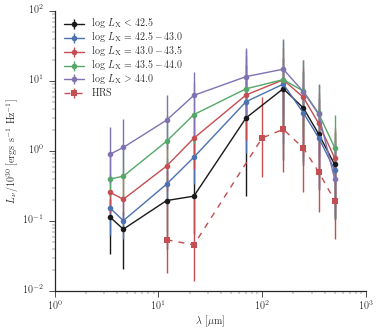

In [21]:
ll = np.array([3.4, 4.6, 12., 22., 70., 160., 250, 350., 500.])
hrs_avg = np.array([0.054622, 0.046096, 1.547204, 2.061236, 1.107824, 0.510250, 0.198203])
hrs_avg_err_dwn = np.array([0.036230, 0.031955, 1.124512, 1.560763, 0.846345, 0.376472, 0.141818])
hrs_avg_err_up = np.array([0.154479, 0.173004, 4.451381, 5.219838, 2.941576, 1.208210, 0.412873])
ll_hrs = np.array([12., 22., 100., 160., 250, 350., 500.])

fig = plt.figure(figsize=(0.8*textwidth, 1.2*3./4*0.8*textwidth))
#fig = plt.figure(figsize=(8, 6.0))
ax1 = fig.add_subplot(111)
ax1.errorbar(ll, binned_seds.loc[0], yerr=np.vstack([binned_seds_err_down.loc[0], binned_seds_err_up.loc[0]]),
             fmt='o', color='k', ls='-', label=r'$\log\,L_{\rm X} < 42.5$')
ax1.errorbar(ll, binned_seds.loc[1], yerr=np.vstack([binned_seds_err_down.loc[1], binned_seds_err_up.loc[1]]),
             fmt='o', color='b', ls='-', label=r'$\log\,L_{\rm X} = 42.5-43.0$')
ax1.errorbar(ll, binned_seds.loc[2], yerr=np.vstack([binned_seds_err_down.loc[2], binned_seds_err_up.loc[2]]),
             fmt='o', color='r', ls='-', label=r'$\log\,L_{\rm X} = 43.0-43.5$')
ax1.errorbar(ll, binned_seds.loc[3], yerr=np.vstack([binned_seds_err_down.loc[3], binned_seds_err_up.loc[3]]),
             fmt='o', color='g', ls='-', label=r'$\log\,L_{\rm X} = 43.5-44.0$')
ax1.errorbar(ll, binned_seds.loc[4], yerr=np.vstack([binned_seds_err_down.loc[4], binned_seds_err_up.loc[4]]),
             fmt='o', color='m', ls='-', label=r'$\log\,L_{\rm X} > 44.0$')
ax1.errorbar(ll_hrs, hrs_avg, yerr=np.vstack([hrs_avg_err_dwn, hrs_avg_err_up]), fmt='s', color='r', ls='--', label='HRS')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_ylabel(r'$L_{\nu}/10^{30}$ [ergs s$^{-1}$ Hz$^{-1}$]')
ax1.set_xlabel('$\lambda$ [$\mu$m]')
ax1.tick_params(axis='both', which='major', labelsize=10)
sn.despine()
ax1.set_ylim(10**(-2), 10**(2))
#ax1.set_xlim(10, 1000)
fig.savefig('/Users/ttshimiz/Dropbox/Research/Thesis/Dissertation/Chapter3/avg_sed_binned_lx_lnu_with_hrs.pdf', bbox_inches='tight')

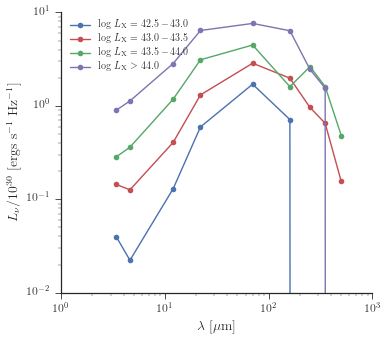

In [38]:
# Plot SEDs subtracted by the lowest luminosity SED
ll = np.array([3.4, 4.6, 12., 22., 70., 160., 250, 350., 500.])

fig = plt.figure(figsize=(0.8*textwidth, 1.2*3./4*0.8*textwidth))
ax1 = fig.add_subplot(111)
#ax1.errorbar(ll, binned_seds.loc[0], yerr=np.vstack([binned_seds_err_down.loc[0], binned_seds_err_up.loc[0]]),
#             fmt='o', color='k', ls='-', label=r'$\log\,L_{\rm X} < 42.5$')
ax1.plot(ll, binned_seds.loc[1]-binned_seds.loc[0],
             marker='o', color='b', ls='-', label=r'$\log\,L_{\rm X} = 42.5-43.0$')
ax1.plot(ll, binned_seds.loc[2]-binned_seds.loc[0],
             marker='o', color='r', ls='-', label=r'$\log\,L_{\rm X} = 43.0-43.5$')
ax1.plot(ll, binned_seds.loc[3]-binned_seds.loc[0],
             marker='o', color='g', ls='-', label=r'$\log\,L_{\rm X} = 43.5-44.0$')
ax1.plot(ll, binned_seds.loc[4]-binned_seds.loc[0],
             marker='o', color='m', ls='-', label=r'$\log\,L_{\rm X} > 44.0$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_ylabel(r'$L_{\nu}/10^{30}$ [ergs s$^{-1}$ Hz$^{-1}$]', fontsize=14)
ax1.set_xlabel('$\lambda$ [$\mu$m]', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()
fig.savefig(figsave_dir+'avg_sed_binned_lx_lnu_sublowL.pdf', bbox_inches='tight')

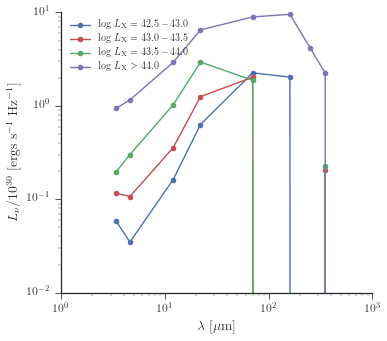

In [37]:
# Plot SEDs subtracted by the lowest luminosity SED
ll = np.array([3.4, 4.6, 12., 22., 70., 160., 250, 350., 500.])

fig = plt.figure(figsize=(0.8*textwidth, 1.2*3./4*0.8*textwidth))
ax1 = fig.add_subplot(111)
#ax1.errorbar(ll, binned_seds.loc[0], yerr=np.vstack([binned_seds_err_down.loc[0], binned_seds_err_up.loc[0]]),
#             fmt='o', color='k', ls='-', label=r'$\log\,L_{\rm X} < 42.5$')
ax1.plot(ll, binned_seds.loc[1]-binned_seds.loc[0]*binned_seds.loc[1, 'LPLW']/binned_seds.loc[0, 'LPLW'],
             marker='o', color='b', ls='-', label=r'$\log\,L_{\rm X} = 42.5-43.0$')
ax1.plot(ll, binned_seds.loc[2]-binned_seds.loc[0]*binned_seds.loc[2, 'LPLW']/binned_seds.loc[0, 'LPLW'],
             marker='o', color='r', ls='-', label=r'$\log\,L_{\rm X} = 43.0-43.5$')
ax1.plot(ll, binned_seds.loc[3]-binned_seds.loc[0]*binned_seds.loc[3, 'LPLW']/binned_seds.loc[0, 'LPLW'],
             marker='o', color='g', ls='-', label=r'$\log\,L_{\rm X} = 43.5-44.0$')
ax1.plot(ll, binned_seds.loc[4]-binned_seds.loc[0]*binned_seds.loc[4, 'LPLW']/binned_seds.loc[0, 'LPLW'],
             marker='o', color='m', ls='-', label=r'$\log\,L_{\rm X} > 44.0$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_ylabel(r'$L_{\nu}/10^{30}$ [ergs s$^{-1}$ Hz$^{-1}$]', fontsize=14)
ax1.set_xlabel('$\lambda$ [$\mu$m]', fontsize=14)
ax1.set_ylim(10**(-2), 10)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()